# Getting reach average shear stresses 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# import topography data
P2_topo = pd.read_csv('../XS_topo/P2_topo.csv')
P3_topo = pd.read_csv('../XS_topo/P3_topo.csv')
P4_topo = pd.read_csv('../XS_topo/P4_topo.csv')
P6_topo = pd.read_csv('../XS_topo/P6_topo.csv')
# using ../ since we are going back a folder to get to the data

# import depth data and make date the index
depth_2021 = pd.read_csv('../water_depth/2021_depths.csv', index_col='Date_Time', parse_dates=True)
depth_2022 = pd.read_csv('../water_depth/2022_depths.csv', index_col='Date_Time', parse_dates=True)
depth_2023 = pd.read_csv('../water_depth/2023_depths.csv', index_col='Date_Time', parse_dates=True)

### Function Definition - Hydraulic Radius

In [5]:
def get_hydraulic_radius(X, Y, WSE):
    wet_areas = []
    wet_perimeters = []
    poly_x = []
    poly_y = []

    # Loop through the points of the cross-section to find wet polygon
    for i in range(len(X) - 1):
        y1, y2 = Y[i], Y[i+1]
        x1, x2 = X[i], X[i+1]

        # First, checking if we enter the water
        if (y1 >= WSE and y2 < WSE):
            # Linear interpolation to find the intersection point
            x_int1 = x1 + (WSE - y1) * (x2 - x1) / (y2 - y1)
            poly_x.append(x_int1)
            poly_y.append(WSE)
        
        # If not, we check if the first point is below the WSE
        if (y1 < WSE):
            poly_x.append(x1)
            poly_y.append(y1)
        
        # Then, we check if we go out of the water. If we did, we calculate the area and store it
        if (y1 < WSE and y2 >= WSE):
            # Linear interpolation to find the intersection point
            x_int2 = x1 + (WSE - y1) * (x2 - x1) / (y2 - y1)
            poly_x.append(x_int2)
            poly_y.append(WSE)

            # Closing the polygon
            if len(poly_x) > 0:
                poly_x.append(poly_x[0])
                poly_y.append(poly_y[0])
            
            # Calculating the area
            tempCalc1 = 0.5 * np.abs(np.dot(poly_x, np.roll(poly_y, 1)) - np.dot(poly_y, np.roll(poly_x, 1)))
            wet_areas.append(tempCalc1)

            # Calculating the wet perimeter
            distances = np.sqrt(np.diff(poly_x)**2 + np.diff(poly_y)**2)
            wet_perimeters.append(np.sum(distances[:-1]))

            # Resetting the polygon
            poly_x = []
            poly_y = []
    
    # return hydraulic radius, wet area, wet perimeter
    tempCalc1 = np.sum(wet_areas)
    wet_area = tempCalc1
    tempCalc2 = np.sum(wet_perimeters)
    wet_perimeter = tempCalc2
    # check if tempCalc2 is zero to avoid division by zero
    if tempCalc2 == 0:
        hydraulic_radius = float('nan')  
    else:
        hydraulic_radius = tempCalc1 / tempCalc2
    
    return hydraulic_radius, wet_area, wet_perimeter

def calculate_hydraulic_radius(topography_df, depth_timeseries, depth_location):
    X = topography_df['distance'].values
    Z = topography_df['elevation'].values
    depth = depth_timeseries['depth'].values
    times = depth_timeseries.index 

    #find the riverbed elevation at the depth measurement location
    riverbed_elevation_at_depth_location = np.interp(depth_location, X, Z)

    hyd_rad = [] 
    wet_area = []
    wet_perimeter = []

    # loop over each time step and calculate hydraulic radius
    for d in depth:
        wse = riverbed_elevation_at_depth_location + d  # wse at this time step
        hydraulic_radius_calc, wet_area_calc, wet_perimeter_calc = get_hydraulic_radius(X, Z, wse)  # calculate hydraulic radius
        hyd_rad.append(hydraulic_radius_calc)
        wet_area.append(wet_area_calc)
        wet_perimeter.append(wet_perimeter_calc)

    # create a DataFrame with time and hydraulic radius for each time step
    R_timeseries = pd.DataFrame({
        'time': times,
        'hydraulic_radius': hyd_rad,
        'wet_area': wet_area,
        'wet_perimeter': wet_perimeter
    }).set_index('time')
    return R_timeseries, 

Prepping data to process through functions

In [6]:
# 2021 piezometers
P2_2021_depth = pd.DataFrame(depth_2021['P2']) 
P2_2021_depth.columns = ['depth'] # change the column name to 'depth'
P3_2021_depth = pd.DataFrame(depth_2021['P3'])
P3_2021_depth.columns = ['depth']
P4_2021_depth = pd.DataFrame(depth_2021['P4'])
P4_2021_depth.columns = ['depth']
P6_2021_depth = pd.DataFrame(depth_2021['P6'])
P6_2021_depth.columns = ['depth']

# 2022 piezometers
P2_2022_depth = pd.DataFrame(depth_2022['P2'])
P2_2022_depth.columns = ['depth']
P3_2022_depth = pd.DataFrame(depth_2022['P3'])
P3_2022_depth.columns = ['depth']
P4_2022_depth = pd.DataFrame(depth_2022['P4'])
P4_2022_depth.columns = ['depth']
P6_2022_depth = pd.DataFrame(depth_2022['P6'])
P6_2022_depth.columns = ['depth']

# 2023 piezometers
P2_2023_depth = pd.DataFrame(depth_2023['P2'])
P2_2023_depth.columns = ['depth']
P3_2023_depth = pd.DataFrame(depth_2023['P3'])
P3_2023_depth.columns = ['depth']
P4_2023_depth = pd.DataFrame(depth_2023['P4'])
P4_2023_depth.columns = ['depth']
P6_2023_depth = pd.DataFrame(depth_2023['P6'])
P6_2023_depth.columns = ['depth']

P2_2022_depth

,depth
Date_Time,
2022-03-01 00:00:00,0.120852
2022-03-01 00:15:00,0.119627
2022-03-01 00:30:00,0.118516
2022-03-01 00:45:00,0.117518
2022-03-01 01:00:00,0.116634
...,...
2022-09-16 23:00:00,0.116895
2022-09-16 23:15:00,0.118644
2022-09-16 23:30:00,0.115145


### Obtaining hydraulic radius by cross section

In [7]:
# 2021 hydraulic radius
P2_2021_hyd_rad = calculate_hydraulic_radius(P2_topo, P2_2021_depth, 0.7)
P3_2021_hyd_rad = calculate_hydraulic_radius(P3_topo, P3_2021_depth, 0.6)
P4_2021_hyd_rad = calculate_hydraulic_radius(P4_topo, P4_2021_depth, 2.5)
P6_2021_hyd_rad = calculate_hydraulic_radius(P6_topo, P6_2021_depth, 1.7)


# 2022 hydraulic radius
P2_2022_hyd_rad = calculate_hydraulic_radius(P2_topo, P2_2022_depth, 0.7)
P3_2022_hyd_rad = calculate_hydraulic_radius(P3_topo, P3_2022_depth, 0.6)
P4_2022_hyd_rad = calculate_hydraulic_radius(P4_topo, P4_2022_depth, 2.5)
P6_2022_hyd_rad = calculate_hydraulic_radius(P6_topo, P6_2022_depth, 1.7)

# 2023 hydraulic radius
P2_2023_hyd_rad = calculate_hydraulic_radius(P2_topo, P2_2023_depth, 0.7)
P3_2023_hyd_rad = calculate_hydraulic_radius(P3_topo, P3_2023_depth, 0.6)
P4_2023_hyd_rad = calculate_hydraulic_radius(P4_topo, P4_2023_depth, 2.5)
P6_2023_hyd_rad = calculate_hydraulic_radius(P6_topo, P6_2023_depth, 1.7)


In [8]:
P2_2022_hyd_rad

(                     hydraulic_radius  wet_area  wet_perimeter
 time                                                          
 2022-03-01 00:00:00          0.052585  0.083359       1.585204
 2022-03-01 00:15:00          0.053841  0.081532       1.514306
 2022-03-01 00:30:00          0.055137  0.079948       1.449982
 2022-03-01 00:45:00          0.056447  0.078587       1.392234
 2022-03-01 01:00:00          0.057355  0.077426       1.349948
 ...                               ...       ...            ...
 2022-09-16 23:00:00          0.057235  0.077765       1.358698
 2022-09-16 23:15:00          0.054980  0.080127       1.457390
 2022-09-16 23:30:00          0.056971  0.075523       1.325653
 2022-09-16 23:45:00          0.055553  0.073304       1.319528
 2022-09-17 00:00:00          0.057507  0.077014       1.339224
 
 [12643 rows x 3 columns],)

In [ ]:
# put all in one dataframe
hydraulic_radius_2021 = pd.concat([P2_2021_hyd_rad, P3_2021_hyd_rad, P4_2021_hyd_rad, P6_2021_hyd_rad], axis=1)
hydraulic_radius_2021.columns = ['P2', 'P3', 'P4', 'P6']
# put all in one dataframe
hydraulic_radius_2022 = pd.concat([P2_2022_hyd_rad, P3_2022_hyd_rad, P4_2022_hyd_rad, P6_2022_hyd_rad], axis=1)
hydraulic_radius_2022.columns = ['P2', 'P3', 'P4', 'P6']
# put all in one dataframe
hydraulic_radius_2023 = pd.concat([P2_2023_hyd_rad, P3_2023_hyd_rad, P4_2023_hyd_rad, P6_2023_hyd_rad], axis=1)
hydraulic_radius_2023.columns = ['P2', 'P3', 'P4', 'P6']

### Obtaining reach average hydraulic radius 

In [15]:
# get average of each piezometer for each time step
average_hydraulic_radius_2021 = hydraulic_radius_2021.mean(axis=1)
average_hydraulic_radius_2022 = hydraulic_radius_2022.mean(axis=1)
average_hydraulic_radius_2023 = hydraulic_radius_2023.mean(axis=1)

### Calculating shear stress as:

$\tau = g \rho s R$

In [16]:
# assigning the other variables
rho = 1000  # density of water in kg/m^3
g = 9.81  # acceleration due to gravity in m/s^2
s = 0.0945 # reach slope in m/m

# calculate shear stress for each time step
shear_stress_2021 = rho * g * s * average_hydraulic_radius_2021
shear_stress_2022 = rho * g * s * average_hydraulic_radius_2022
shear_stress_2023 = rho * g * s * average_hydraulic_radius_2023

### Plot the shear stress record for each year

2021

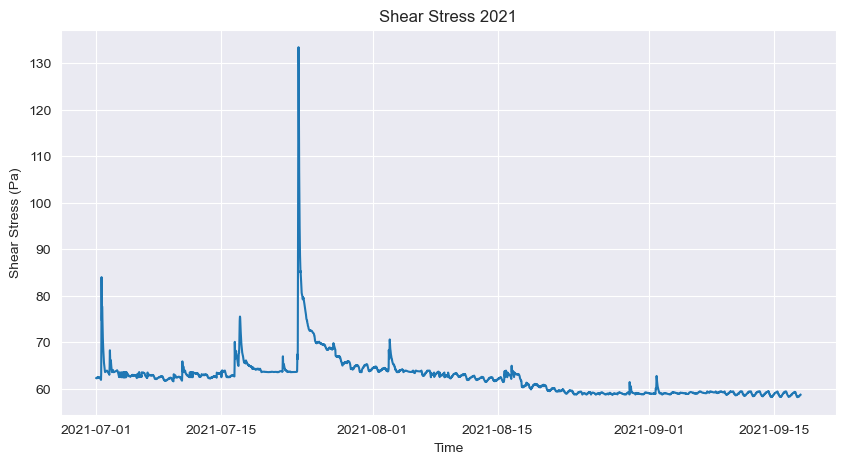

In [18]:
# 2021
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(shear_stress_2021)
plt.title('Shear Stress 2021')
plt.xlabel('Time')
plt.ylabel('Shear Stress (Pa)')
plt.show()

2022

Text(0, 0.5, 'Shear Stress (Pa)')

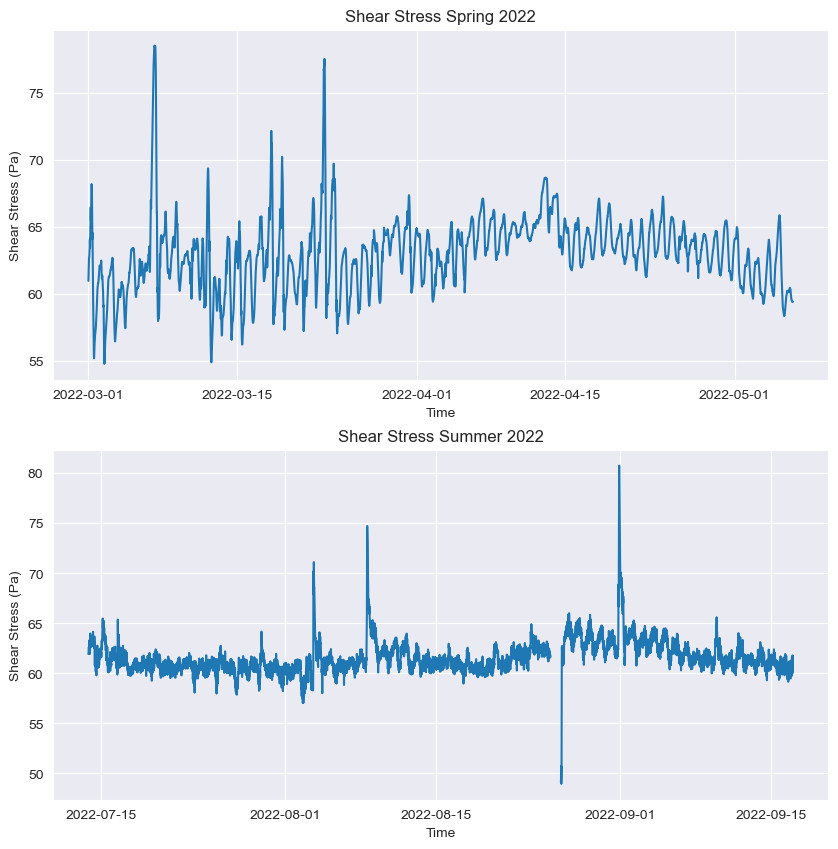

In [27]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, sharex=False)

# spring 2022
sns.set_style('darkgrid')
spring = shear_stress_2022['2022-03-01':'2022-06-01']
ax[0].plot(spring) 
ax[0].set_title('Shear Stress Spring 2022')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Shear Stress (Pa)')

# summer 2022
summer = shear_stress_2022['2022-06-01':'2022-09-18']
ax[1].plot(summer)
ax[1].set_title('Shear Stress Summer 2022')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Shear Stress (Pa)')


2023

Text(0, 0.5, 'Shear Stress (Pa)')

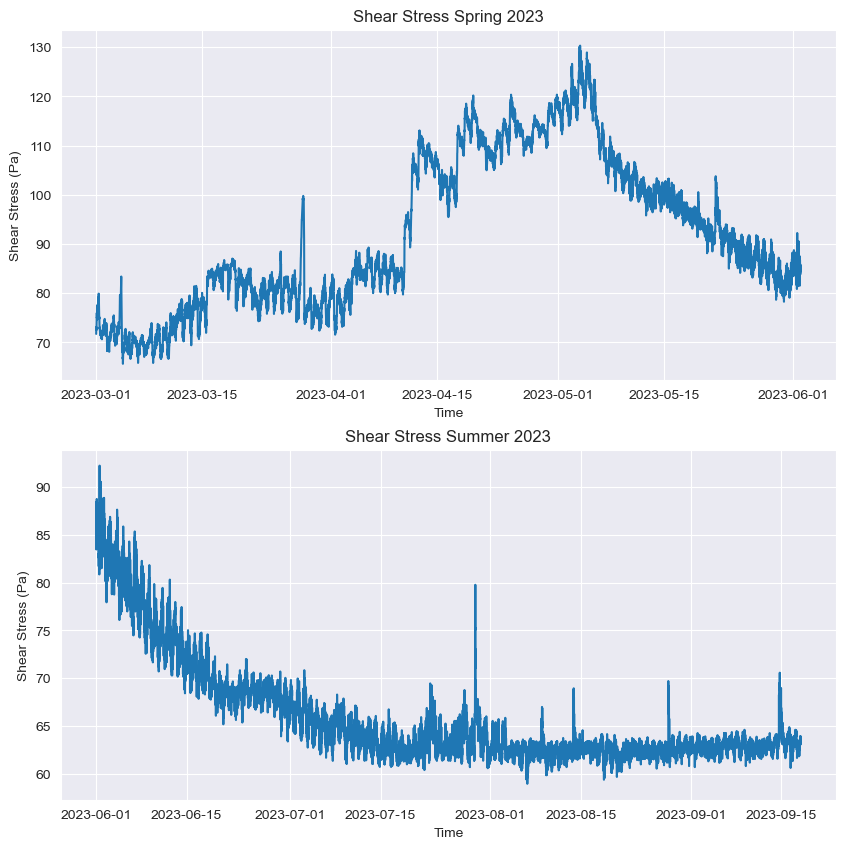

In [28]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, sharex=False)

# spring 2023
sns.set_style('darkgrid')
spring = shear_stress_2023['2023-03-01':'2023-06-01']
ax[0].plot(spring) 
ax[0].set_title('Shear Stress Spring 2023')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Shear Stress (Pa)')

# summer 2023
summer = shear_stress_2023['2023-06-01':'2023-09-18']
ax[1].plot(summer)
ax[1].set_title('Shear Stress Summer 2023')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Shear Stress (Pa)')
